# Importálás

In [127]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
# Nlp library
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
from sklearn.feature_extraction.text import CountVectorizer

# sklearn Library
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import explained_variance_score

#Tenserflow Library
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding,  Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings("ignore")

# Adatvizualizáció

In [128]:
jobs = pd.read_csv('fake_job_postings.csv')

In [129]:
jobs.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


<AxesSubplot:ylabel='fraudulent'>

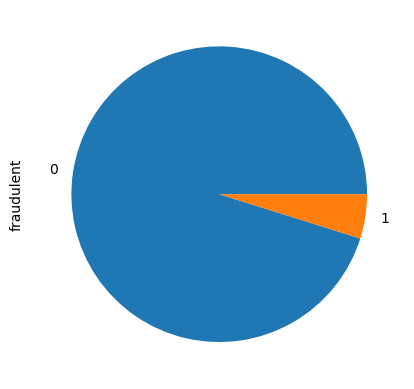

In [130]:
jobs.fraudulent.value_counts().plot(kind='pie')

In [131]:
print(jobs.fraudulent.value_counts()[0]/len(jobs))
print(jobs.fraudulent.value_counts()[0])
print(jobs.fraudulent.value_counts()[1])

0.9515659955257271
17014
866


# Naive Bayes

In [132]:
is_fraud = jobs['fraudulent'] == 1
df_try = jobs[is_fraud]
jobs_over=jobs
jobs_over=jobs_over.append([df_try]*18,ignore_index=True)

<AxesSubplot:ylabel='fraudulent'>

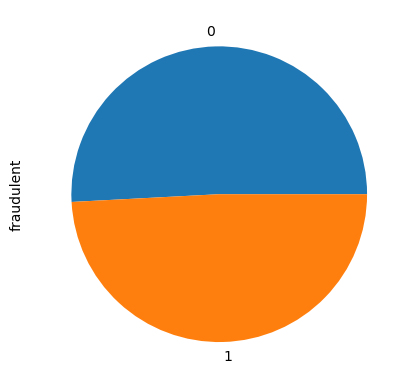

In [133]:
jobs_over.fraudulent.value_counts().plot(kind='pie')

In [134]:
jobs_last = jobs_over.drop(columns = ['job_id','company_profile', 'description', 'benefits', 'requirements','fraudulent'])
jobs_last.head()
X=np.zeros((len(jobs_last),len(jobs_last.columns)))
for j in range(len(jobs_last.columns)):
    le = preprocessing.LabelEncoder()
    # Converting string labels into numbers.
    Xoszlop=le.fit_transform(jobs_last[jobs_last.columns[j]])
    X[:,j]=Xoszlop
print(X[:4])

[[6.043e+03 2.535e+03 7.580e+02 8.740e+02 0.000e+00 1.000e+00 0.000e+00
  2.000e+00 4.000e+00 1.300e+01 1.310e+02 2.200e+01]
 [2.183e+03 1.073e+03 1.161e+03 8.740e+02 0.000e+00 1.000e+00 0.000e+00
  1.000e+00 6.000e+00 1.300e+01 7.500e+01 7.000e+00]
 [1.763e+03 1.867e+03 1.337e+03 8.740e+02 0.000e+00 1.000e+00 0.000e+00
  5.000e+00 7.000e+00 1.300e+01 1.310e+02 3.700e+01]
 [2.990e+02 1.703e+03 1.054e+03 8.740e+02 0.000e+00 1.000e+00 0.000e+00
  1.000e+00 5.000e+00 1.000e+00 2.200e+01 3.100e+01]]


In [135]:
y = jobs_over.fraudulent.values
y = y.reshape(-1,1)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 0)

In [149]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB(class_prior=[jobs_over.fraudulent.value_counts()[0],jobs_over.fraudulent.value_counts()[1]])
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

In [150]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9521959964146998


In [151]:
# Az előző kézzel.
acc=np.zeros((2,2))
for i in range(len(X_test)):
    out=y_pred[i]
    if out==0 and y_test[i]==0:
        acc[0,0]=acc[0,0]+1
    if out==1 and y_test[i]==0:
        acc[1,0]=acc[1,0]+1
    if out==0 and y_test[i]==1:
        acc[0,1]=acc[0,1]+1
    if out==1 and y_test[i]==1:
        acc[1,1]=acc[1,1]+1
print(acc)

[[1516.   21.]
 [ 139. 1671.]]


# Adat átalakítás

Csak a description oszlopot tartom meg.

In [6]:
jobs_last = jobs.drop(columns = ['job_id','title','location','department', 'telecommuting',
                             'salary_range','company_profile','requirements','benefits','employment_type',
                             'required_experience','required_education','industry','function','has_company_logo','has_questions'])
jobs_last.head()

,description,fraudulent
0,"Food52, a fast-growing, James Beard Award-winn...",0
1,Organised - Focused - Vibrant - Awesome!Do you...,0
2,"Our client, located in Houston, is actively se...",0
3,THE COMPANY: ESRI – Environmental Systems Rese...,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0


In [7]:
jobs_last.fillna(" ", inplace = True)
jobs_last['word count'] = [len(i.split(' ')) for i in jobs_last['description']]

In [8]:
jobs_last.head()

,description,fraudulent,word count
0,"Food52, a fast-growing, James Beard Award-winn...",0,124
1,Organised - Focused - Vibrant - Awesome!Do you...,0,309
2,"Our client, located in Houston, is actively se...",0,50
3,THE COMPANY: ESRI – Environmental Systems Rese...,0,345
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0,182


Átalakítom a szavak számokká. Minden szó egy sorszámot kap, így minden description egy vektor lesz.

In [9]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

In [10]:
max_features = 10000
t = Tokenizer(num_words = max_features)
# fit the tokenizer on the documents
t.fit_on_texts(list(jobs_last['description']))

In [11]:
encoded_docs = t.texts_to_sequences(list(jobs_last['description']))

In [12]:
sent_length = jobs_last['word count'].max()
embedded_docs=pad_sequences(encoded_docs,padding='pre',maxlen=sent_length)

In [13]:
print(embedded_docs)

[[   0    0    0 ...    1  431  175]
 [   0    0    0 ... 5360  817   23]
 [   0    0    0 ...    1  282 1335]
 ...
 [   0    0    0 ...  256  393    1]
 [   0    0    0 ...  706  202   92]
 [   0    0    0 ... 2948 1224   23]]


In [14]:
y = jobs_last.fraudulent.values
y = y.reshape(-1,1)
X = np.array(embedded_docs)

# Egyszerű Döntési fa

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1, random_state= 101)

In [16]:
print("X_train shape: ",X_train.shape)
print("X_test shape : ",X_test.shape )
print("y_train shape: ",y_train.shape)
print("y_test shape : ",y_test.shape)

X_train shape:  (16092, 2074)
X_test shape :  (1788, 2074)
y_train shape:  (16092, 1)
y_test shape :  (1788, 1)


In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=10)
clf = clf.fit(X_train, y_train)

In [18]:
#tree.plot_tree(clf)

In [19]:
y_pred = clf.predict(X_test)

In [20]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9608501118568232


In [21]:
# Az előző kézzel.
acc=np.zeros((2,2))
for i in range(len(X_test)):
    out=clf.predict([X_test[i]])
    if out==0 and y_test[i]==0:
        acc[0,0]=acc[0,0]+1
    if out==1 and y_test[i]==0:
        acc[1,0]=acc[1,0]+1
    if out==0 and y_test[i]==1:
        acc[0,1]=acc[0,1]+1
    if out==1 and y_test[i]==1:
        acc[1,1]=acc[1,1]+1
print(acc)

[[1698.   64.]
 [   6.   20.]]


In [22]:
print(acc[1,1]/sum(acc[:,1]))

0.23809523809523808


In [25]:
depth=np.arange(1,15)
acc1=[]
for j in range(1,15):
    clf = tree.DecisionTreeClassifier(criterion="gini",max_depth=j)
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc=np.zeros((2,2))
    for i in range(len(X_test)):
        if y_pred[i]==0 and y_test[i]==0:
            acc[0,0]=acc[0,0]+1
        if y_pred[i]==1 and y_test[i]==0:
            acc[1,0]=acc[1,0]+1
        if y_pred[i]==0 and y_test[i]==1:
            acc[0,1]=acc[0,1]+1
        if y_pred[i]==1 and y_test[i]==1:
            acc[1,1]=acc[1,1]+1
    acc1.append(acc[1,1]/sum(acc[:,1]))

Text(0.5, 0, 'Tree depth')

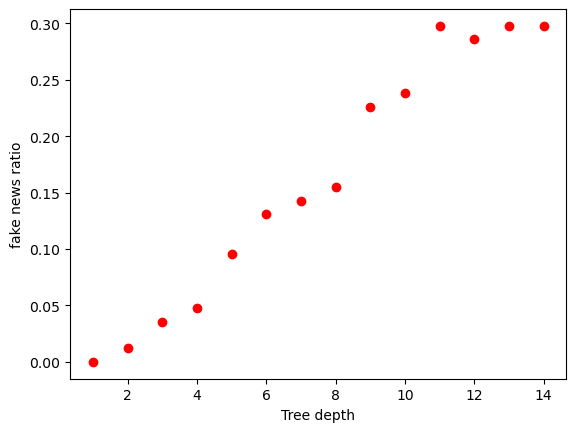

In [26]:
import matplotlib.pyplot as plt
plt.plot(depth,acc1,'ro')
plt.ylabel('fake news ratio')
plt.xlabel('Tree depth')

In [27]:
from sklearn import svm
clf = svm.SVC(kernel='poly',max_iter=10000)
clf = clf.fit(X_train[:600], y_train[:600])

In [28]:
y_pred = clf.predict(X_test)

In [29]:
# Az előző kézzel.
acc=np.zeros((2,2))
for i in range(len(X_test)):
    out=clf.predict([X_test[i]])
    if out==0 and y_test[i]==0:
        acc[0,0]=acc[0,0]+1
    if out==1 and y_test[i]==0:
        acc[1,0]=acc[1,0]+1
    if out==0 and y_test[i]==1:
        acc[0,1]=acc[0,1]+1
    if out==1 and y_test[i]==1:
        acc[1,1]=acc[1,1]+1
print(acc)

[[1704.   81.]
 [   0.    3.]]


In [25]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [26]:
acc=np.zeros((2,2))
for i in range(len(X_test)):
    out=clf.predict([X_test[i]])
    if out==0 and y_test[i]==0:
        acc[0,0]=acc[0,0]+1
    if out==1 and y_test[i]==0:
        acc[1,0]=acc[1,0]+1
    if out==0 and y_test[i]==1:
        acc[0,1]=acc[0,1]+1
    if out==1 and y_test[i]==1:
        acc[1,1]=acc[1,1]+1
print(acc)

[[1719.   48.]
 [   3.   18.]]


In [18]:
>>> from sklearn.feature_extraction.text import TfidfVectorizer
>>> corpus = [
...     'This is the first document.',
...     'This document is the second document.',
...     'And this is the third one.',
...     'Is this the first document?',
... ]
>>> vectorizer = TfidfVectorizer()
>>> X = vectorizer.fit_transform(corpus)
>>> print(vectorizer.get_feature_names_out())
print(X.toarray())
>>> print(X.shape)
print(type(X))
vectorizer.vocabulary_.get('is')

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
(4, 9)
<class 'scipy.sparse.csr.csr_matrix'>


3